# Lab 2: Machine Learning
#### Team Members: Alfonso De Vera, Joel Karakkattu, Loretta Malinovic, Alexandra Monte

All imports for tasks have to be run at least once before the tasks can run, or else certain methods will fail.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib
import random
import matplotlib.image as mpimg

#### Task 01 – Generate Class Names

Use NumPy’s `np.array()` to create a list of class names from the subdirectories in your training folder.


In [6]:
data_dir = pathlib.Path("datagiven/data/CIFAR-10-images/train/")
class_names = np.array(sorted([p.name for p in data_dir.iterdir() if p.is_dir()]))
print(class_names, len(class_names))


['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


Now associate each class name with a numeric label for use in machine learning.


In [7]:
class_names_dict = {name: idx for idx, name in enumerate(class_names)}
len(class_names_dict), class_names_dict


(10,
 {np.str_('airplane'): 0,
  np.str_('automobile'): 1,
  np.str_('bird'): 2,
  np.str_('cat'): 3,
  np.str_('deer'): 4,
  np.str_('dog'): 5,
  np.str_('frog'): 6,
  np.str_('horse'): 7,
  np.str_('ship'): 8,
  np.str_('truck'): 9})

#### Task 02 – Displaying an Image

Use the `display_random_img(target_dir, target_class)` function to display random sample images and check the data.


In [9]:
def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(os.path.join(target_folder, random_image[0]))

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

Image shape: (32, 32, 3)


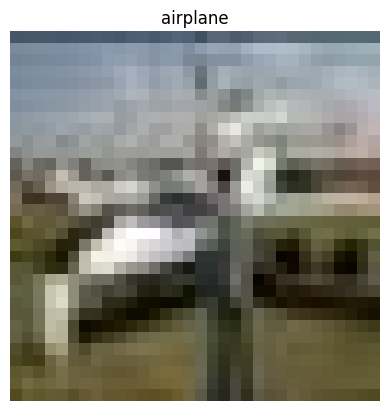

In [10]:
img = display_random_img("datagiven/data/CIFAR-10-images/train/", np.random.choice(class_names))


Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


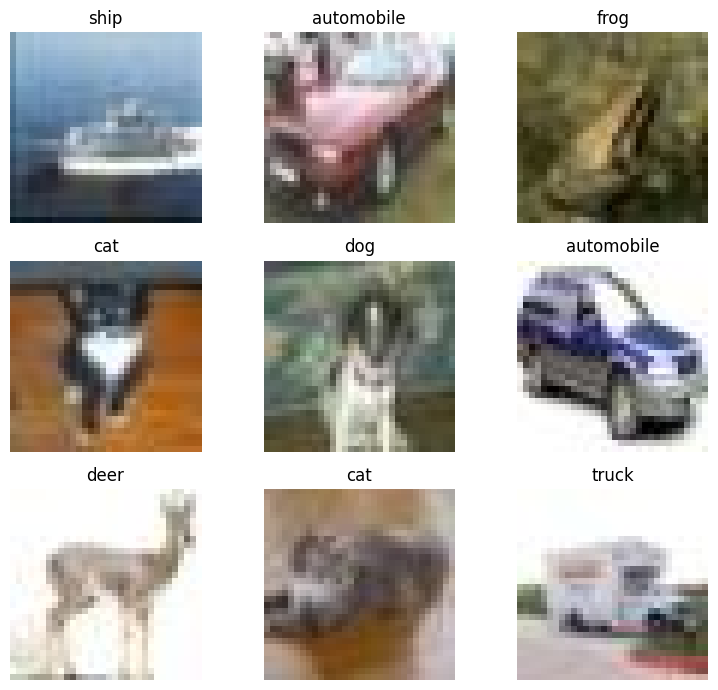

In [11]:
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    target_class = np.random.choice(class_names)
    img = display_random_img("datagiven/data/CIFAR-10-images/train/", target_class)
    plt.axis(False)
plt.tight_layout()



In [12]:
print(img)
print("Image shape:", np.shape(img))

[[[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[193 181 183]
  [193 181 183]
  [195 183 185]
  ...
  [154  76  74]
  [148  70  68]
  [147  69  67]]

 [[198 183 188]
  [198 183 188]
  [197 182 185]
  ...
  [147  97  90]
  [128  78  71]
  [125  75  68]]

 [[193 178 183]
  [192 177 182]
  [192 177 180]
  ...
  [221 183 174]
  [207 170 161]
  [210 173 164]]]
Image shape: (32, 32, 3)


**Task 03 - Load images as features and labels**

Finish the function to load the images and their corresponding labels and return them as numpy arrays

In [23]:
data_dir = pathlib.Path("datagiven/data/CIFAR-10-images/train/")
class_names = np.array(sorted([p.name for p in data_dir.iterdir() if p.is_dir()]))
print(class_names, len(class_names))
class_names_dict = {name: idx for idx, name in enumerate(class_names)}


['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


In [15]:
def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns
    X -- images as numpy array
    y -- labels as numpy array
    """

    X = []
    y = []

    # Durch alle Unterordner und Dateien laufen
    for root, dirs, files in os.walk(target_dir):
        for file in files:
            if file.endswith((".png", ".jpg", ".jpeg")):
                # Pfad zur Datei
                file_path = os.path.join(root, file)
                # Bild laden
                img = mpimg.imread(file_path)
                # Normalisieren
                img = img / 255.0

                # Label bestimmen
                label_name = os.path.basename(root)
                label_idx = class_name_dictionary[label_name]

                X.append(img)
                y.append(label_idx)

    # In NumPy-Arrays umwandeln
    X = np.array(X)
    y = np.array(y)

    return X, y


In [16]:
X_train, y_train = load_images_as_features_and_labels('datagiven/data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('datagiven/data/CIFAR-10-images/test/', class_names_dict)


In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [18]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


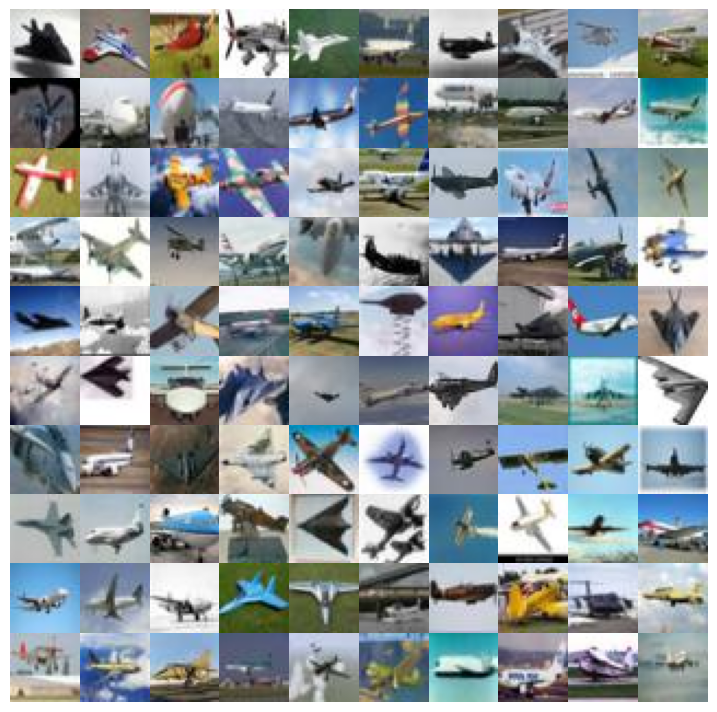

In [19]:
print_multiple_figures(X_train)


**TASK 04 - Reshaping your data set to make it compatible with the ML algorithm**

Use numpys shape and reshape functions to reshape the data https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [20]:
# Wir formen die Trainings- und Testdaten um (flatten)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Ausgabe prüfen
print(X_train_flattened.shape, X_test_flattened.shape)


(50000, 3072) (10000, 3072)


**TASK 05 - load and train a RandomForestClassifier**

use scikit-learns random forest classifier and use your data set to train it https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Random Forest-Classifier erstellen
rnf_clf = RandomForestClassifier(
    n_estimators=100,      # Anzahl der Bäume im Wald
    random_state=42,       # für reproduzierbare Ergebnisse
    n_jobs=-1              # nutzt alle Prozessorkerne -> schneller
)

# Modell auf Trainingsdaten trainieren
rnf_clf.fit(X_train_flattened, y_train)


CPU times: total: 9min 53s
Wall time: 3min 37s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Vorhersagen auf Testdaten treffen
y_pred_clf = rnf_clf.predict(X_test_flattened)

# Ausgabe prüfen
print("Predictions shape:", y_pred_clf.shape)
print("Example predictions:", y_pred_clf[:10])


Predictions shape: (10000,)
Example predictions: [8 0 0 7 0 6 9 0 0 0]


#### TASK 06 - Evaluate the classifier
##### Use scikit-learn’s score functions to evaluate accuracy, precision, recall and F1-score, and then visualize the performance with a confusion matrix.


In [32]:
# TASK 06 - Evaluate the classifier
# Wir importieren die Bewertungsmetriken aus scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Berechnung der wichtigsten Klassifikationsmetriken
accuracy = accuracy_score(y_test, y_pred_clf)
precision = precision_score(y_test, y_pred_clf, average='macro')
recall = recall_score(y_test, y_pred_clf, average='macro')
f1 = f1_score(y_test, y_pred_clf, average='macro')

# Ergebnisse ausgeben
print("=== Evaluation Metrics for RandomForestClassifier ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

=== Evaluation Metrics for RandomForestClassifier ===
Accuracy : 0.4644
Precision: 0.4599
Recall   : 0.4644
F1-Score : 0.4608


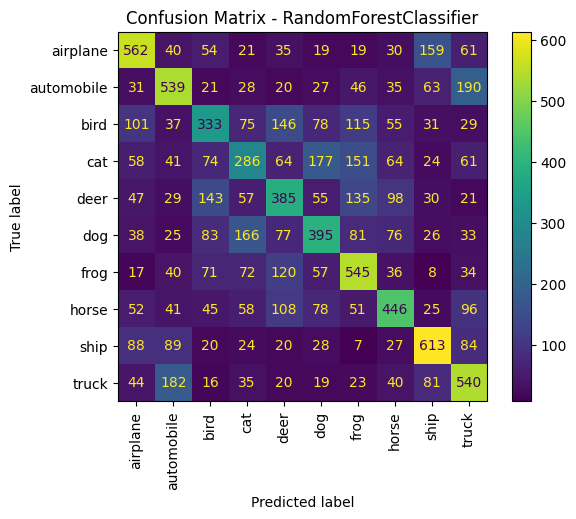

In [30]:
# Confusion Matrix zur grafischen Auswertung der Klassifikatorleistung
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical', cmap='viridis')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()